
# Project: Tmdb-movies Database Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project, we investigate a tmdb-movie database containing detailed information of more than 10k movies and expect to have a deep understanding of the relationship between a variety of movie features. 


In [29]:
# import a variety of important libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline



<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [45]:
# load tmdb-movie data from the CSV file
df = pd.read_csv('tmdb-movies.csv')

# show the first 5 rows in the database to get a sense of parameters included in the database
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [46]:
df.shape

(10866, 21)

Here we investigate the overall size of the file. In this database, there are 10866 entries of tmdb movies in total with 21 features.

In [47]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


As we can see from above summary, there is large variation in popularity, budeget and revenue. There are some issues wih budget and revenue since it doesn't make sense to analyze films with zero budget or revenue. We need to remove these non-sense data points later.

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

### Check data format

In [49]:
# show the data type of all the columns
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

All the coumns are in desired data formats.


## Data Cleaning
We need to remove incompleted and non-sense data points from the database.

#### 1. Delete unnecessary columns including 'id', 'imdb_id', 'homepage', 'tagline', 'overview', 'release_date', 'production_companies', 'keywords', 'budget_adj', 'revenue_adj'.

In [50]:
df.drop(['id', 'imdb_id', 'homepage', 'tagline', 'overview', 'release_date', 'production_companies', 'keywords', 'budget_adj', 'revenue_adj'], axis = 1, inplace = True)

In [51]:
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2947,7.3,2015


Now we have only 11 columns instead of 21 columns to explore.

#### 2. Delete duplicate rows.

First, let's take a look at the total number of non-null entries before removing duplicates.

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
cast              10790 non-null object
director          10822 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
dtypes: float64(2), int64(5), object(4)
memory usage: 933.9+ KB


Now, let's remove the duplicated rows but still keep the first one.

In [53]:
df.drop_duplicates(keep = 'first', inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 11 columns):
popularity        10865 non-null float64
budget            10865 non-null int64
revenue           10865 non-null int64
original_title    10865 non-null object
cast              10789 non-null object
director          10821 non-null object
runtime           10865 non-null int64
genres            10842 non-null object
vote_count        10865 non-null int64
vote_average      10865 non-null float64
release_year      10865 non-null int64
dtypes: float64(2), int64(5), object(4)
memory usage: 1018.6+ KB


The total entry number is reduced from 10866 to 10865 suggesting we have deleted one duplicated row.

#### 3. Clean up genres data with NaN.

The number of genres column is less than other columns indicating some of genres data is missing. We need to take a detailed investigation on it.

In [54]:
df[df.genres.isnull()]

,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year
424,0.244648,0,0,Belli di papÃ,Diego Abatantuono|Matilde Gioli|Andrea Pisani|...,Guido Chiesa,100,NaN,21,6.1,2015
620,0.129696,0,0,All Hallows' Eve 2,NaN,Antonio Padovan|Bryan Norton|Marc Roussel|Ryan...,90,NaN,13,5.0,2015
997,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,Steward Lee|Steven G. Lee,44,NaN,13,6.8,2014
1712,0.302095,0,0,Prayers for Bobby,Ryan Kelley|Sigourney Weaver|Henry Czerny|Dan ...,Russell Mulcahy,88,NaN,57,7.4,2009
1897,0.020701,0,0,Jonas Brothers: The Concert Experience,Nick Jonas|Joe Jonas|Kevin Jonas|John Lloyd Ta...,Bruce Hendricks,76,NaN,11,7.0,2009
2370,0.081892,0,0,Freshman Father,Britt Irvin|Merrilyn Gann|Barbara Tyson|Anthon...,Michael Scott,0,NaN,12,5.8,2010
2376,0.068411,0,0,Doctor Who: A Christmas Carol,Matt Smith|Karen Gillan|Arthur Darvill|Michael...,NaN,62,NaN,11,7.7,2010
2853,0.130018,0,0,Vizontele,YÄ±lmaz ErdoÄŸan|Demet Akbag|Altan Erkekli|Cem...,YÄ±lmaz ErdoÄŸan,110,NaN,12,7.2,2001
3279,0.145331,0,0,ì•„ê¸°ì™€ ë‚˜,Jang Keun-suk|Song Ha-yoon|Kim Jeong-Nan,Kim Jin-Yeong,96,NaN,11,6.1,2008
4547,0.520520,0,0,London 2012 Olympic Opening Ceremony: Isles of...,Queen Elizabeth II|Mike Oldfield|Kenneth Brana...,Danny Boyle,220,NaN,12,8.3,2012


Here we list all the entries without genre information (NaN). For these entries, we notice that budget and revenue are both zero which don't make sense. So we can drop these entries.

In [55]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 11 columns):
popularity        10731 non-null float64
budget            10731 non-null int64
revenue           10731 non-null int64
original_title    10731 non-null object
cast              10731 non-null object
director          10731 non-null object
runtime           10731 non-null int64
genres            10731 non-null object
vote_count        10731 non-null int64
vote_average      10731 non-null float64
release_year      10731 non-null int64
dtypes: float64(2), int64(5), object(4)
memory usage: 1006.0+ KB


Now we have all the columns with the same amount of non-null data points.

#### 4. Delete rows with either budget or revenue equal to zero.


First, we exam how many entries has either budget or revenue equal to zero.

In [56]:
df.loc[(df['budget']==0) | (df['revenue']==0)]

,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year
30,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,Bill Condon,103,Mystery|Drama,425,6.4,2015
36,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,Afonso Poyart,101,Crime|Drama|Mystery,474,6.2,2015
48,2.932340,30000000,0,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,Simon West,92,Thriller|Crime|Drama,481,5.3,2015
67,2.331636,20000000,0,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,James McTeigue,96,Crime|Thriller|Action,280,5.4,2015
72,2.272044,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,Jean-Baptiste LÃ©onetti,95,Thriller,81,5.5,2015
74,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,Anne K. Black,108,Action|Adventure|Fantasy,27,5.1,2015
75,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,Alfonso Gomez-Rejon,105,Comedy|Drama,569,7.7,2015
88,1.959765,0,2000000,Equals,Kristen Stewart|Nicholas Hoult|Guy Pearce|Jack...,Drake Doremus,101,Drama|Romance|Science Fiction,135,5.6,2015
92,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,A. Todd Smith,0,Fantasy|Action|Adventure,11,5.4,2015
93,1.872696,10000000,0,Vice,Ambyr Childers|Thomas Jane|Bryan Greenberg|Bru...,Brian A Miller,96,Thriller|Science Fiction|Action|Adventure,181,4.1,2015


We found there are 6882 entries with either budget or revenue of 0. Something is wrong with these data points. We need to remove these entries from the database.

In [64]:
df1 = df[(df['budget']!=0) & (df['revenue']!=0)]
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3849 entries, 0 to 10848
Data columns (total 11 columns):
popularity        3849 non-null float64
budget            3849 non-null int64
revenue           3849 non-null int64
original_title    3849 non-null object
cast              3849 non-null object
director          3849 non-null object
runtime           3849 non-null int64
genres            3849 non-null object
vote_count        3849 non-null int64
vote_average      3849 non-null float64
release_year      3849 non-null int64
dtypes: float64(2), int64(5), object(4)
memory usage: 360.8+ KB


Now we removed the entries with zero budget/revenue. We have 3849 valid entries in total.
Let's take a look at histgrams of these entries.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000010CEEA20>,
      dtype=object)

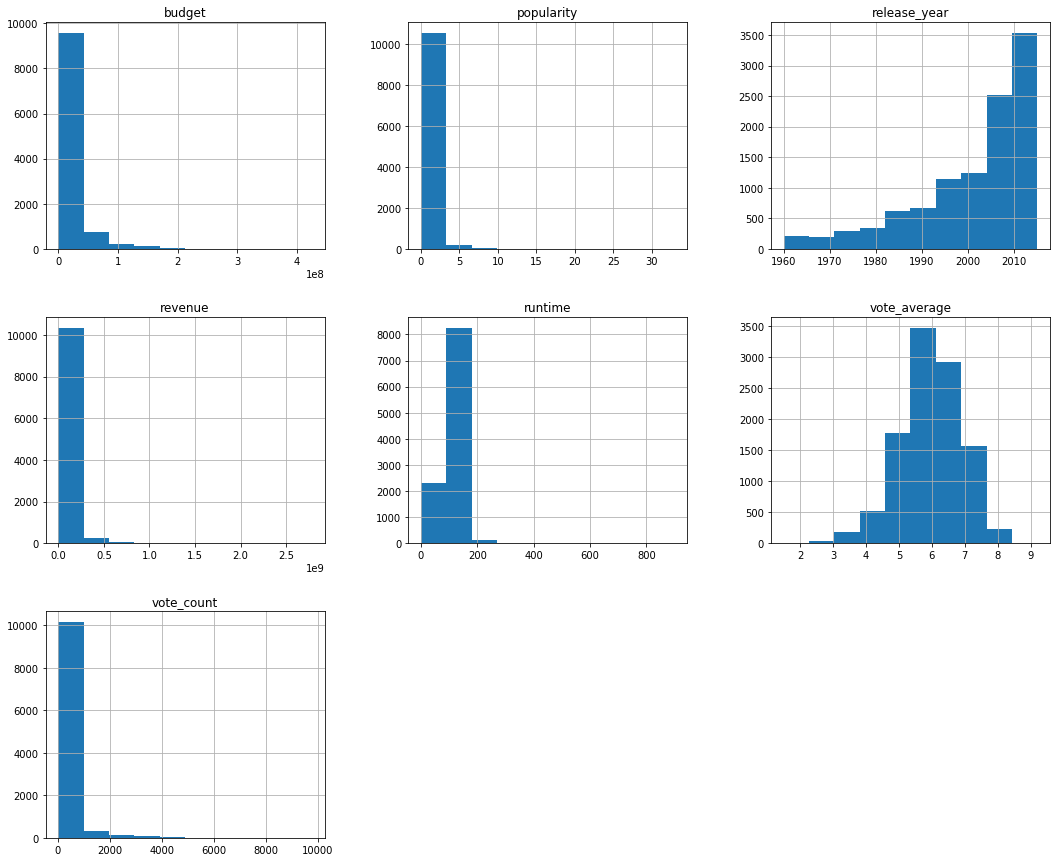

In [65]:
df.hist(figsize=(18, 15))

<a id='eda'></a>
## Exploratory Data Analysis

### Question 1: Which director is the most productive?

We want to know which director produce the most films. To do so, we first define a function which takes a column as an input, extract the data and keep the count.

In [72]:
def separation(column):
    # separate the string of a column by '|'
    data1 = df1[column].str.cat(sep = '|')
    
    # generate a pandas series with the values separately
    data1 = pd.Series(data1.split('|'))
    
    # provid values in descending order
    total_count = data1.value_counts(ascending = False)
    
    return total_count

In [85]:
# Return a count of director names showing in the 'director' column
director_count = separation('director')

# Exhibit the top 6 directors
director_count.head(6)

Steven Spielberg    28
Clint Eastwood      24
Ridley Scott        21
Woody Allen         18
Tim Burton          17
Robert Rodriguez    17
dtype: int64

Steven Spielberg is the most productive director who produces 28 films in total. Clint Eastwood and Ridley Scott are on the 2nd and 3rd positions producing more than 20 films for each. To investigate more details, we want to take a look at directors with no less than 15 films.

In [108]:
# Generate director_count1 to store the director information with no less than 15 films
director_count1 = director_count[director_count>=15]

# Sort out the directors in an aschending order
director_count1.sort_values(ascending = True, inplace = True)

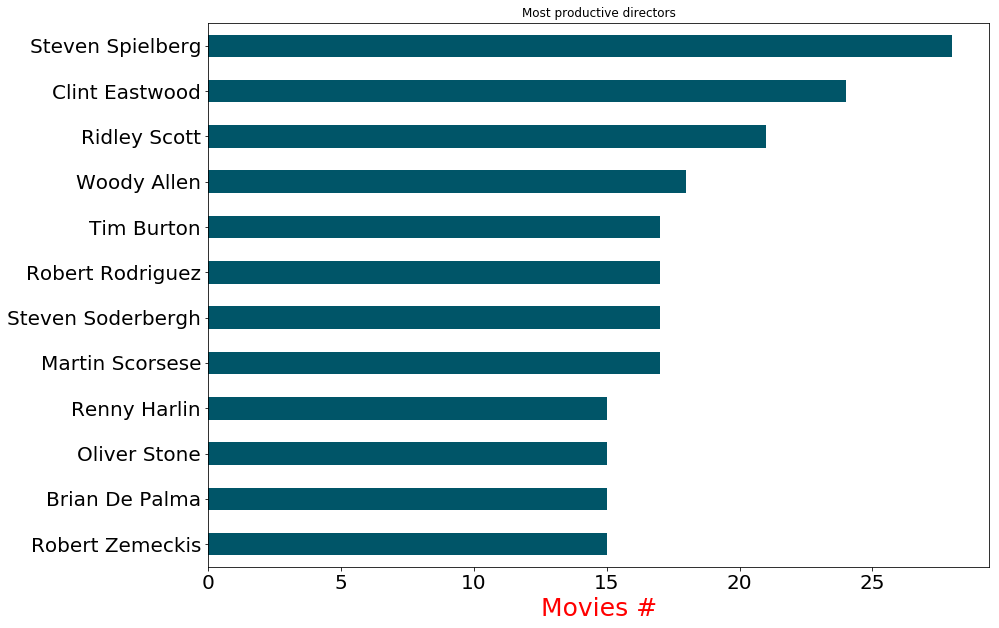

In [112]:
# Generate plot
ax = director_count1.plot.barh(color = '#005568', fontsize = 20)

# Add a title
ax.set(title = 'Most productive directors')

# Add x-label
ax.set_xlabel('Movies #', color = 'r', fontsize = '25')

# Figure size(width, height)
ax.figure.set_size_inches(14, 10)

# Show the plot
plt.show()

### Question 2: Which genres are the most popular?

In [92]:
# Separate 'genres' column by '|' and store the value to genre_count
genre_count = separation('genres')

# Show top 6 most popular genres
genre_count.head(6)

Drama        1753
Comedy       1357
Thriller     1203
Action       1085
Adventure     749
Romance       666
dtype: int64

Now we want to plot out genre distribution in a histogram. 

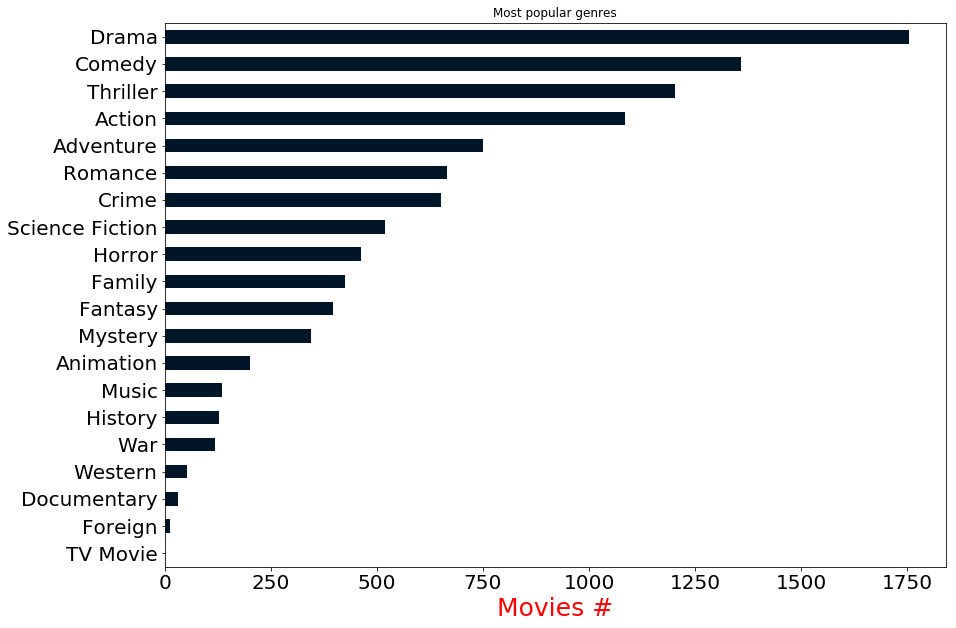

In [113]:
# Sort out the genres in an aschending order
genre_count.sort_values(ascending = True, inplace = True)

# Generate plot
ax = genre_count.plot.barh(color = '#001528', fontsize = 20)

# Add a title
ax.set(title = 'Most popular genres')

# Add x-label
ax.set_xlabel('Movies #', color = 'r', fontsize = '25')

# Figure size(width, height)
ax.figure.set_size_inches(14, 10)

# Show the plot
plt.show()

It is clear that Drama, comdey and thriller are the top 3 most popular genres. The film numbers of these three genres are significantly higher than others. 

### Question 3: Which films are the most and least profitable?

To answer this question, we first need to calculate the profit of each movie.

Below is our current data columns. 

In [87]:
df1.head(1)

,popularity,budget,revenue,profit,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015


We want to calculate profit by substrating budget from revenue and then add one more column for profit next to revenue column.

In [67]:
# calculate profit and insert one column next to revenue
df1.insert(3, 'profit', df1['revenue'] - df1['budget'])

# show the first 3 rows of current database
df1.head(3)

,popularity,budget,revenue,profit,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
1,28.419936,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
2,13.112507,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.3,2015


In [82]:
# index of the highest profit movie from profit column
highest_id = df1['profit'].idxmax()

# Extract the detailed information of the highest profit movie
highest_movie = pd.DataFrame(df1.loc[highest_id])

# Show details of the highest profit movie
highest_movie

,1386
popularity,9.43277
budget,237000000
revenue,2781505847
profit,2544505847
original_title,Avatar
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
director,James Cameron
runtime,162
genres,Action|Adventure|Fantasy|Science Fiction
vote_count,8458


In [83]:
# index of the lowest profit movie from profit column
lowest_id = df1['profit'].idxmin()

# Extract the detailed information of the lowest profit movie
lowest_movie = pd.DataFrame(df1.loc[lowest_id])

# Show details of the lowest profit movie
lowest_movie

,2244
popularity,0.25054
budget,425000000
revenue,11087569
profit,-413912431
original_title,The Warrior's Way
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,Sngmoo Lee
runtime,100
genres,Adventure|Fantasy|Action|Western|Thriller
vote_count,74


The most profitable movie is Avatar directed by James Cameron. It is filmed in 2009 with a total profit of 2.5+ billion US dollars. In comparison, the least profitable movie is The Warrior's Way with a total loss (negative profit) of 400+ million US dollars.

### Question 4: Which kinds of properties are associated with movies that have high profits?

To explore the factors which may be related to the high profit, we first need to define the correlation function as follows to calculate r which is important to tell how relevant the factors are.

In [114]:
def correlation(x, y):
    std_x = (x - x.mean()) /x.std(ddof=0)
    std_y = (y - y.mean()) /y.std(ddof=0)
    
    return (std_x * std_y).mean()

First, we take a look at popularity vs profit. We will calculate r first and then plot out popularity vs. profit.

In [115]:
correlation(df1['popularity'], df1['profit'])

0.5960802044338931

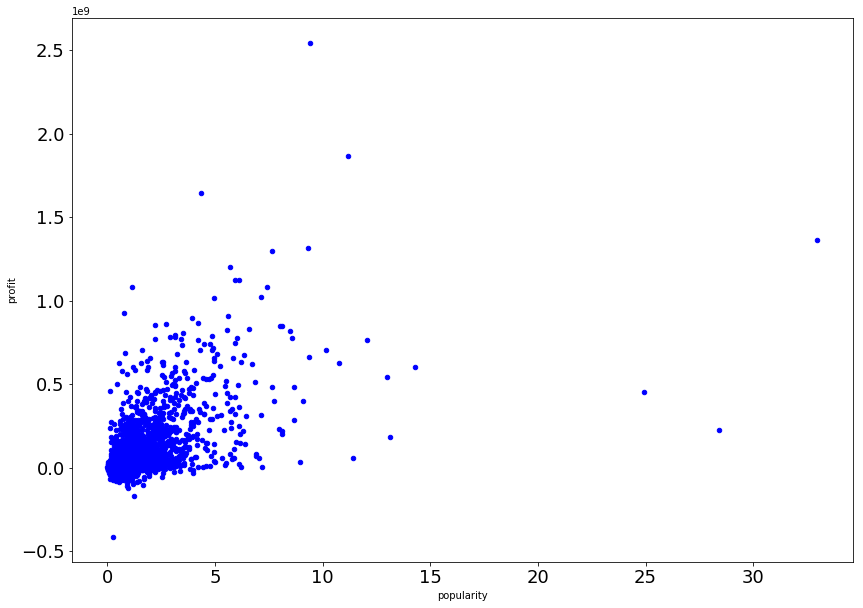

In [119]:
# Plot for popularity vs. profit.
df1.plot.scatter(x='popularity', y='profit', color = 'b', fontsize = '18', figsize=(14, 10))


There is a relatively strong correlation between popularity and profit since r ~ 0.6. The general trend is that the higher popularity score, the higher profit. It makes sense since the more popular films usually gain more focus and more people intend to watch the film leading to high profit.

Then let's focus on the budget vs profit.

In [120]:
correlation(df1['budget'], df1['profit'])

0.5266595220688903

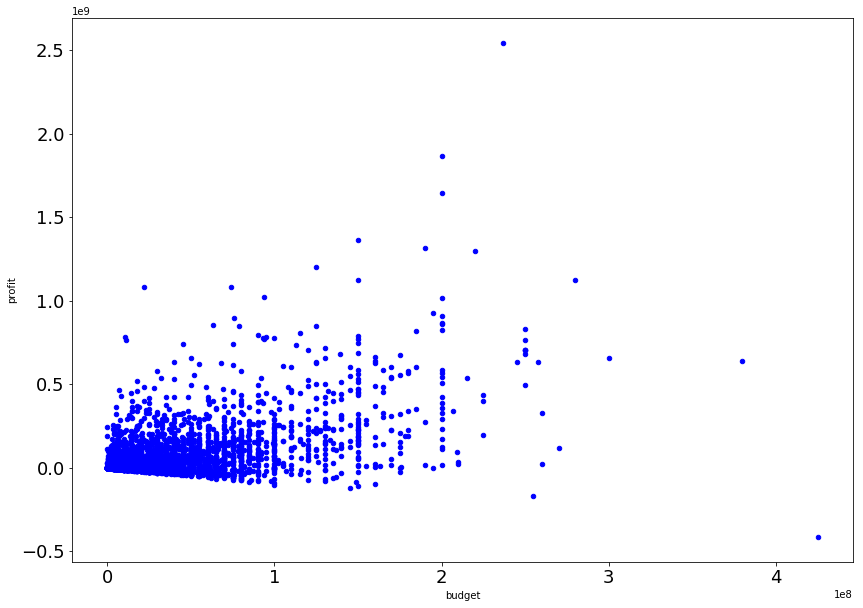

In [121]:
# Plot for budget vs. profit.
df1.plot.scatter(x='budget', y='profit', color = 'b', fontsize = '18', figsize=(14, 10))

r = 0.53 indicates that there is a relatively strong correlation between budget and profit. But there is no clear pattern to show that higher budget will lead to high profit for sure. Usually, a film with high budget can recruit famous director and film stars but the success of the film also depends on other factors. That's probably why the relation is not strong.

Now let's take a look at runtime vs. profit.

In [123]:
correlation(df1['runtime'], df1['profit'])

0.22059705250728998

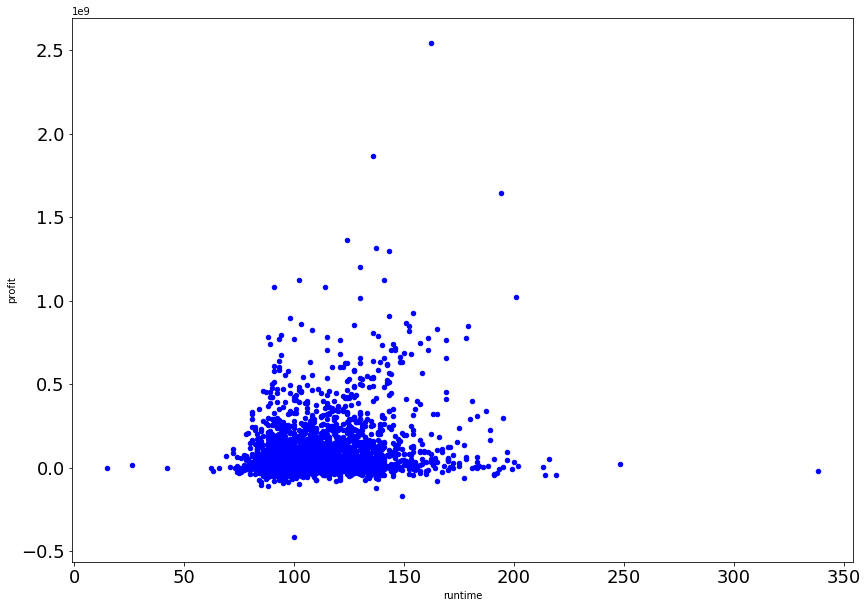

In [124]:
# Plot for runtime vs. profit.
df1.plot.scatter(x='runtime', y='profit', color = 'b', fontsize = '18', figsize=(14, 10))

It seems that runtime has a weak relationship with profit.

Now let's investigate revenue vs. profit

In [126]:
correlation(df1['revenue'], df1['profit'])

0.9791384505651677

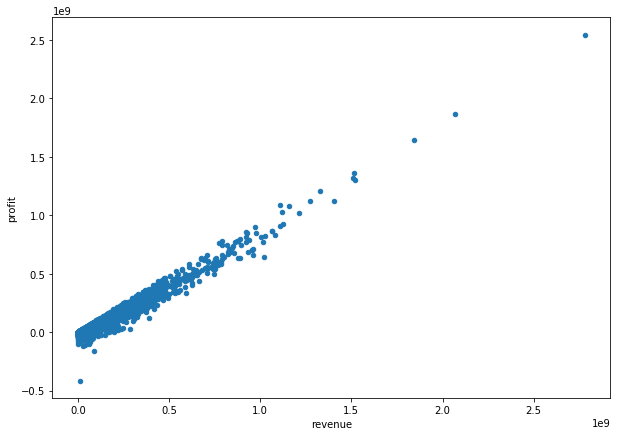

In [128]:
df1.plot.scatter(x='revenue', y='profit', figsize=(10, 7))

There is a very strong linear relationship between revenue and profit. Almost all the high revenue films have high profit, indicating the budget is not a big concern if the film gets popular.

To sum up for question 4, we investigated four parameters which may relate to profit. Among these parameters, the revenue is highly related to profit with r close to 1. The second most related factor is popularity followed by budget. The run time is the least-related factor.

<a id='conclusions'></a>
## Conclusions

> In this project, we systematically cleaned and analyzed the movie data from tmdb movie database. It should be noted that there is still some limitation of this project. We don't have the information about the audience, such as age, sex, and so on. If we can have more information about the audience, we can definitely perform more in-depth analysis.

> We investigated the most productive director. We found that Steven Spielberg is the most productive director who produces 28 films in total. Clint Eastwood and Ridley Scott are on the 2nd and 3rd positions producing more than 20 films for each. There are in total 12 directors who direct no less than 15 films.

> We studied the most popular genres and found that Drama, comdey and thriller are the top 3 most popular genres. The film numbers of these three genres are significantly higher than others. 

> From all the listed films, we found the most and least profitable films. The most profitable film is Avatar directed by James Cameron. It is filmed in 2009 with a total profit of 2.5+ billion US dollars. In comparison, the least profitable film is The Warrior's Way with a total loss (negative profit) of 400+ million US dollars. 

> Finally, we studied the parameters which may impact film profit. Among these parameters, the revenue is highly related to profit with r close to 1. The second most related factor is popularity followed by budget. The run time is the least-related factor.

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])